In [1]:
using Revise
using RealNeuralNetworks
using RealNeuralNetworks.Neurons
using RealNeuralNetworks.NBLASTs
using RealNeuralNetworks.NeuralNets

using ProgressMeter

In [2]:
originalNeuronIdList=Int[76749 76752 77142 77369 77374 77446 77455 78453 78633 78679 76540 76622 76626 76697 76748 76750 76751 77122 77151 77238 77239 77240 77241 77437 77645 77708 77740 77826 78351 78541 78543 78545 78558 78572 78641 76611 77630 79058 79064 79067 79069 79080 79086 77374 76618 76625 76627 77132 77162 77163 77329 77434 77447 77460 77467 77797 77805 77848 78357 78358 79054 79055 79059 79062 79074 79077 79085 78544 78650 77390 77621 77636 77651 77656 77342 77352 77336 77354 77373 78346 77433 77435 77453 77461 76629 76667 80185 76691 76692 77357 77389 77689 77806 77816 78601 77667 77684 80163 80167 80177 80179 76688 80204 80206 80210 76682] |> vec

106-element Array{Int64,1}:
 76749
 76752
 77142
 77369
 77374
 77446
 77455
 78453
 78633
 78679
 76540
 76622
 76626
     ⋮
 78601
 77667
 77684
 80163
 80167
 80177
 80179
 76688
 80204
 80206
 80210
 76682

In [3]:
neuronList = Vector{Neuron}()
neuronIdList = Vector{Int}()
@showprogress for neuronId in originalNeuronIdList
    fileName = "../01_data/0920/postprocessed/atlas_space/bin/$(neuronId).bin"
    if isfile(fileName)
        neuron = Neurons.load(fileName)
        # resample to 500 nm inter node distance
        neuron = Neurons.resample(neuron, Float32(500))
        push!(neuronList, neuron)
        push!(neuronIdList, neuronId)
    end
end

Progress: 100%|█████████████████████████████████████████| Time: 0:00:01


In [4]:

vectorCloudList = Vector{Matrix{Float32}}()

@showprogress for neuron in neuronList
    vectorCloud = NBLASTs.VectorCloud(neuron)
    vectorCloud[1:3,:] ./= Float32(1000)
    push!(vectorCloudList, vectorCloud)
end

Progress: 100%|█████████████████████████████████████████| Time: 0:00:15


In [5]:
# @time similarityMatrix =NBLASTs.nblast_allbyall(vectorCloudList; normalisation=:raw)
@time similarityMatrix =NBLASTs.nblast_allbyall(vectorCloudList; normalisation=:mean)

computing similarity matrix...100%|█████████████████████| Time: 0:07:60


488.366603 seconds (4.88 G allocations: 140.423 GiB, 6.83% gc time)


105×105 Array{Float32,2}:
  1.0         0.0811061  -0.618683   …  -0.683616   -0.535595   -0.733284 
  0.0811061   1.0        -0.378987      -0.471377   -0.37629    -0.582833 
 -0.618683   -0.378987    1.0           -0.0466467   0.026133   -0.063524 
 -0.365859   -0.0721813  -0.388093      -0.19313    -0.126603   -0.303399 
  0.117605    0.304785   -0.538356      -0.466513   -0.396657   -0.523789 
  0.0781907   0.386059   -0.486997   …  -0.64553    -0.582867   -0.714313 
 -1.01218    -0.534059   -0.0127948      0.0689144   0.0600398  -0.0635618
 -0.0348114   0.0281116  -0.407419      -0.555825   -0.491798   -0.647537 
  0.0538829  -0.0405345  -0.375629      -0.470469   -0.384404   -0.573052 
 -0.581728   -0.316043   -0.223276      -0.218398   -0.173163   -0.271215 
 -0.33807    -0.274032   -0.0798983  …   0.292559    0.315765    0.354807 
 -0.449053   -0.237934   -0.308569      -0.177269   -0.228936   -0.165564 
 -0.63457    -0.469468    0.0713817      0.341791    0.356949    0.412423 

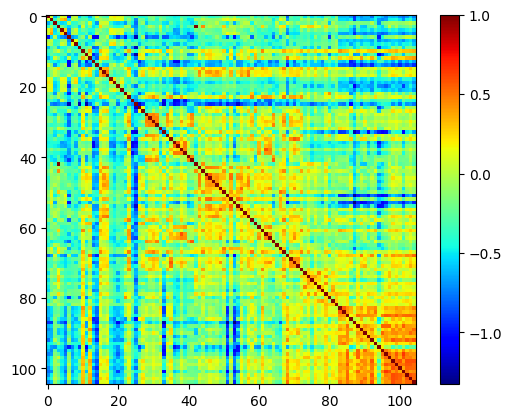

PyObject <matplotlib.colorbar.Colorbar object at 0x7f9deb9125f8>

In [6]:
using PyPlot
PyPlot.imshow(similarityMatrix, interpolation="nearest", cmap="jet")
PyPlot.colorbar()

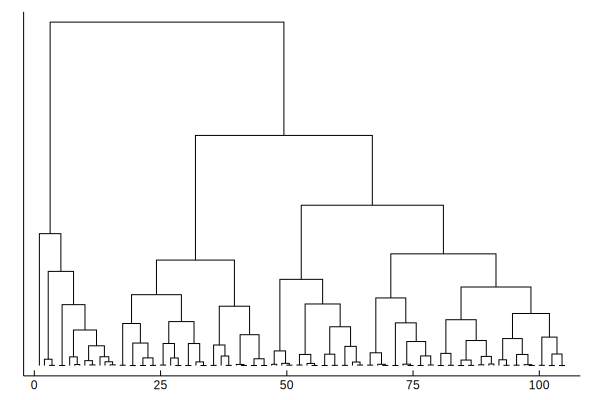

In [15]:
using Clustering

hc = hclust(-similarityMatrix, linkage=:ward)

using Pkg
include(joinpath(Pkg.devdir(), "RealNeuralNetworks/src/Utils/PlotRecipes.jl"))
using .PlotRecipes
PlotRecipes.plot(hc)


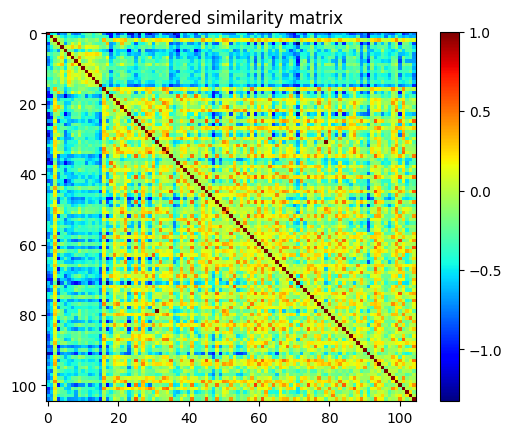

PyObject Text(0.5, 1.0, 'reordered similarity matrix')

In [16]:
# k = 12
# labels = cutree(hc, k=k)

reorderedSimilarityMatrix = NeuralNets.reorder_matrix(similarityMatrix, hc.order)

PyPlot.imshow(reorderedSimilarityMatrix, interpolation="nearest", cmap="jet")
PyPlot.colorbar()
PyPlot.title("reordered similarity matrix")

In [9]:
@show hc.order
@show labels

hc.order = [26, 14, 16, 54, 5, 25, 20, 6, 21, 2, 8, 19, 1, 22, 9, 15, 17, 52, 37, 70, 48, 67, 31, 34, 27, 103, 12, 11, 50, 55, 71, 43, 30, 44, 53, 101, 10, 38, 72, 61, 65, 100, 40, 41, 59, 99, 35, 95, 86, 23, 45, 51, 84, 39, 42, 81, 32, 85, 18, 97, 73, 105, 75, 36, 96, 29, 80, 91, 13, 64, 87, 88, 63, 28, 98, 83, 90, 58, 94, 4, 56, 78, 92, 24, 89, 33, 60, 46, 77, 69, 79, 7, 57, 104, 62, 82, 66, 3, 49, 68, 102, 47, 76, 74, 93]


UndefVarError: UndefVarError: labels not defined

In [12]:
orders = NeuralNets.labels2orders(labels)

orders

UndefVarError: UndefVarError: labels not defined

In [14]:
println("reordered ")
@show neuronIdList[hc.order]

neuronIdList[hc.order] = [77740, 76748, 76751, 77467, 77446, 77708, 77239, 77455, 77240, 77142, 78633, 77238, 76749, 77241, 78679, 76750, 77122, 77447, 79058, 77621, 77162, 78544, 78545, 78641, 77826, 80206, 76626, 76622, 77329, 77797, 77636, 77374, 78543, 76618, 77460, 76688, 76540, 79064, 77651, 79055, 79077, 80179, 79069, 79080, 78358, 80177, 76611, 77667, 80185, 77437, 76625, 77434, 76629, 79067, 79086, 77435, 78558, 76667, 77151, 80163, 77656, 76682, 77352, 77630, 77684, 78541, 77433, 77689, 76697, 79074, 76691, 76692, 79062, 78351, 80167, 77461, 77389, 78357, 78601, 77374, 77805, 77373, 77806, 77645, 77357, 78572, 79054, 76627, 77354, 77390, 78346, 78453, 77848, 80210, 79059, 77453, 79085, 77369, 77163, 78650, 80204, 77132, 77336, 77342, 77816]


105-element Array{Int64,1}:
 77740
 76748
 76751
 77467
 77446
 77708
 77239
 77455
 77240
 77142
 78633
 77238
 76749
     ⋮
 80210
 79059
 77453
 79085
 77369
 77163
 78650
 80204
 77132
 77336
 77342
 77816